<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Нам представлены данные Банка,  чтоб разобраться в действиях уходящих клиентов. целью данногь исследования является изучение поведения уходящих клиентов банка для удерживание их.

In [1]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import numpy as np
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import metrics

/tmp/ipykernel_122/1856855038.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [3]:
data = pd.read_csv('/datasets/Churn.csv') 

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# ProfileReport(data)

в датасете около 9 процентов пропусков в столбце Tenure.
заметим корреляцию между уходом клиентов и возростом и количеством используемых продуктов.

In [8]:
data.Tenure.isna().sum()

909

In [9]:
data.Tenure.describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

In [10]:
data.loc[data.Exited == 0, 'Tenure'].isna().sum()

726

80% пропусков в столбце Tenure у клиентов, кто покинул банк.поэтому мыне можем удалить их, заменять средним значением не целеособразно, так как мы не можем сказать, после скольких лет клиент отказался от услаги банка, заполним эти данные 0 

In [11]:
data = data.dropna(subset=['Tenure'])

удалим данные с пропусками, так как они составляют около 9 %

In [12]:
data.Tenure.isna().sum()


0

In [13]:
data.duplicated(subset='CustomerId').sum()

0

у нас нет дубликатов по Id клиентов

## Исследование задачи

разделим выборки на три части: train, test, valid

In [14]:
data.Gender = pd.get_dummies(data.Gender, drop_first=True)
data.Geography = pd.get_dummies(data, drop_first=True)

In [15]:
features = data.drop(['Exited', 'Surname','RowNumber','CustomerId'], axis=1)

удалил категориальные переменные для проведения исследования

In [16]:
target = data.Exited

In [17]:
features_train, features_test, target_train, target_test =  train_test_split\
            (features, target, test_size=0.4, random_state=12345) 


In [18]:
features_test, features_valid, target_test, target_valid = train_test_split\
            (features_test, target_test, test_size=0.5, random_state=12345) 

In [19]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance','EstimatedSalary','NumOfProducts']


pd.options.mode.chained_assignment = None
scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [20]:
features_test.shape

(1818, 10)

In [21]:
features_valid.shape

(1819, 10)

In [22]:
features_train.shape


(5454, 10)

In [23]:
best_result = 0
best_leaf = 0
for depth in range(2, 15, 3):
    for leaf in range(1, 201, 10):
        model_decision_tree = DecisionTreeClassifier(criterion = 'entropy',random_state=12345, max_depth=depth, min_samples_leaf=leaf)
        model_decision_tree.fit(features_train, target_train)
        predictions_valid = model_decision_tree.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            best_result = result
            best_leaf = leaf
                
print('min_samples_leaf =', leaf)
print('max_depth =', depth, ':',best_result)
print("F1:", f1_score(target_valid, predictions_valid))
probabilities_valid = model_decision_tree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
print('Roc-Auc:', auc_roc) 


min_samples_leaf = 191
max_depth = 14 : 0.5403624382207578
F1: 0.46296296296296297
Roc-Auc: 0.7937539299937121


In [24]:
confusion_matrix(target_valid,predictions_valid)

array([[1404,   64],
       [ 226,  125]])

попробуем обучить модель без баланса классов 

In [25]:
model = LogisticRegression(random_state=12345)
model.fit(features_train,target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
print('Roc-Auc:', auc_roc) 

F1: 0.2557077625570776
Roc-Auc: 0.7661857518805748


значение F1-меры  снизилось

при дисбалансе классов значение  F1-меры уменьшается

## Борьба с дисбалансом

### DecisionTreeClassifier

значение F1-меры низкое, попробуем ее увеличить

In [26]:
best_result = 0
best_leaf = 0
for depth in range(2, 15, 3):
    for leaf in range(1, 201, 10):
        model_decision_tree = DecisionTreeClassifier(criterion = 'entropy',class_weight='balanced',random_state=12345, max_depth=depth, min_samples_leaf=leaf)
        model_decision_tree.fit(features_train, target_train)
        predictions_valid = model_decision_tree.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_result = result
            best_leaf = leaf
            
print('min_samples_leaf =', leaf)
print('max_depth =', depth, ':',best_result)
print("F1:", f1_score(target_valid, predicted_valid))
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
print('Roc-Auc:', auc_roc) 


min_samples_leaf = 191
max_depth = 14 : 0.2557077625570776
F1: 0.2557077625570776
Roc-Auc: 0.7661857518805748


In [27]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [28]:
best_result = 0
best_leaf = 0
for depth in range(2, 15, 3):
    for leaf in range(1, 201, 10):
        for ind in range(1,15,1):
            features_upsampled, target_upsampled = upsample(features_train, target_train, ind)
            model_decision_tree = DecisionTreeClassifier(criterion = 'entropy',random_state=12345, max_depth=depth, min_samples_leaf=leaf)
            model_decision_tree.fit(features_upsampled,target_upsampled)
            predictions_valid = model_decision_tree.predict(features_valid)
            result = f1_score(target_valid, predictions_valid)
            if result > best_result:
                best_result = result
                best_leaf = leaf
            
print('min_samples_leaf =', leaf)
print('max_depth =', depth, ':',best_result)
print("F1:", f1_score(target_valid, predictions_valid))
probabilities_valid = model_decision_tree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
print('Roc-Auc:', auc_roc) 

min_samples_leaf = 191
max_depth = 14 : 0.5834502103786817
F1: 0.43983402489626555
Roc-Auc: 0.8203895836729624


обучим модель при помощи логистической регрессии

### LogisticRegression

In [29]:
model = LogisticRegression(random_state=12345, class_weight='balanced', solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
print('Roc-Auc:', auc_roc) 


F1: 0.4738955823293173
Roc-Auc: 0.7706067522143817


значение F1-меры низкое, попробуем ее увеличить

увеличим выборки 

In [31]:
for ind in range(1,15,1):
    features_upsampled, target_upsampled = upsample(features_train, target_train, ind)        
    model = LogisticRegression( solver='liblinear', random_state=12345)
    model.fit(features_upsampled,target_upsampled)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_result = result
print('optimal indicator =', ind, ':',best_result)
print("F1:", f1_score(target_valid, predicted_valid))
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
print('Roc-Auc:', auc_roc) 


optimal indicator = 14 : 0.5834502103786817
F1: 0.36012526096033404
Roc-Auc: 0.7678606084600635


значение F1-меры практически не изменилось

In [32]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    fraction = 0.25
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)
features_downsampled, target_downsampled= shuffle(features_downsampled,target_downsampled, random_state=12345)


In [33]:
model = LogisticRegression(random_state=12345,solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
print('Roc-Auc:', auc_roc) 

F1: 0.47420634920634924


значение F1-меры уменьшилось 

In [34]:
model = LogisticRegression(class_weight='balanced',random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0.4, 0.64, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    precision = precision_score(target_valid,predicted_valid) # < напишите код здесь >
    recall = recall_score(target_valid,predicted_valid)# < напишите код здесь >
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]

    auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, auc_roc = {:.3f}, F1 = {:.3f}".format(
        threshold, precision, recall,auc_roc, f1))
   
    
    

Порог = 0.40 | Точность = 0.313, Полнота = 0.843, auc_roc = 0.771, F1 = 0.456
Порог = 0.42 | Точность = 0.327, Полнота = 0.818, auc_roc = 0.771, F1 = 0.467
Порог = 0.44 | Точность = 0.330, Полнота = 0.778, auc_roc = 0.771, F1 = 0.463
Порог = 0.46 | Точность = 0.341, Полнота = 0.738, auc_roc = 0.771, F1 = 0.467
Порог = 0.48 | Точность = 0.358, Полнота = 0.715, auc_roc = 0.771, F1 = 0.477
Порог = 0.50 | Точность = 0.366, Полнота = 0.672, auc_roc = 0.771, F1 = 0.474
Порог = 0.52 | Точность = 0.373, Полнота = 0.638, auc_roc = 0.771, F1 = 0.471
Порог = 0.54 | Точность = 0.383, Полнота = 0.607, auc_roc = 0.771, F1 = 0.470
Порог = 0.56 | Точность = 0.399, Полнота = 0.573, auc_roc = 0.771, F1 = 0.470
Порог = 0.58 | Точность = 0.410, Полнота = 0.553, auc_roc = 0.771, F1 = 0.471
Порог = 0.60 | Точность = 0.425, Полнота = 0.527, auc_roc = 0.771, F1 = 0.471
Порог = 0.62 | Точность = 0.438, Полнота = 0.487, auc_roc = 0.771, F1 = 0.462


### RandomForestClassifier

In [35]:
best_model = None
best_result = 0
for est in range(1, 61,20):
    for depth in range(1,11,3): 
        for leaf in range(1,15,3):
            model_random_forrest = RandomForestClassifier( class_weight='balanced', random_state=12345, n_estimators=est, max_depth=depth, min_samples_leaf=leaf) 
            model_random_forrest.fit(features_train, target_train) 
            result = model_random_forrest.score(features_valid, target_valid)
            if result > best_result:
                best_model = model_random_forrest 
                best_result = result
print(best_model)
print('min_samples_leaf =', leaf)
print('max_depth =', depth, ':',best_result)
print("F1:", f1_score(target_valid, predictions_valid))
print("Accuracy наилучшей модели :", best_result)
print('F1 :', f1_score(target_valid, predicted_valid))
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
print('auc_roc :', auc_roc)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=41,
                       random_state=12345)
min_samples_leaf = 13
max_depth = 10 : 0.8240791643760308
F1: 0.43983402489626555
Accuracy наилучшей модели : 0.8240791643760308
F1 : 0.4615384615384615
auc_roc : 0.7706067522143817


In [36]:
best_result = 0
best_leaf = 0
for est in range(50, 101,20):
    for depth in range(55,65,3): 
        for leaf in range(10,21,3):
            for ind in range(1,15,5):
                features_upsampled, target_upsampled = upsample(features_train, target_train, ind)
                model_random_tree = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, min_samples_leaf=leaf)
                model_random_tree.fit(features_upsampled,target_upsampled)
                predictions_valid = model_random_tree.predict(features_valid)
                result = f1_score(target_valid, predictions_valid)
                if result > best_result:
                    best_result = result
                    best_leaf = leaf
            
print('min_samples_leaf =', leaf)
print('max_depth =', depth, ':',best_result)
print("F1:", f1_score(target_valid, predictions_valid))
probabilities_valid = model_random_tree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
print('Roc-Auc:', auc_roc) 

min_samples_leaf = 19
max_depth = 64 : 0.5577523413111342
F1: 0.5082781456953642
Roc-Auc: 0.8479373840409263


In [ ]:
best_result = 0
best_leaf = 0
for est in range(50, 101,20):
    for depth in range(55,65,3): 
        for leaf in range(10,21,3):
            for ind in range(1,15,5):
                features_upsampled, target_upsampled = upsample(features_train, target_train, ind)
                model_random_tree = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, min_samples_leaf=leaf)
                model_random_tree.fit(features_downsampled,target_downsampled)
                predictions_valid = model_random_tree.predict(features_valid)
                result = f1_score(target_valid, predictions_valid)
                if result > best_result:
                    best_result = result
                    best_leaf = leaf
            
print('min_samples_leaf =', leaf)
print('max_depth =', depth, ':',best_result)
print("F1:", f1_score(target_valid, predictions_valid))
probabilities_valid = model_random_tree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
print('Roc-Auc:', auc_roc) 

Таким образом, наибольший результат показала модель случайного дерева

## Тестирование модели

протестируем модель с наибольшем f1-мерой на тестовой выборке 

In [37]:
model_random_forrest = RandomForestClassifier(class_weight='balanced',random_state=12345, n_estimators = 120, max_depth = 10, min_samples_leaf = 2) 
model_random_forrest.fit(features_train, target_train) 
predicted_test = model_random_forrest.predict(features_test)
print('F1:',f1_score(target_test, predicted_test))
probabilities_test = model_random_forrest.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test,probabilities_one_test)
print('Roc-Auc:',auc_roc)

F1: 0.6053921568627451
Roc-Auc: 0.844169518294288


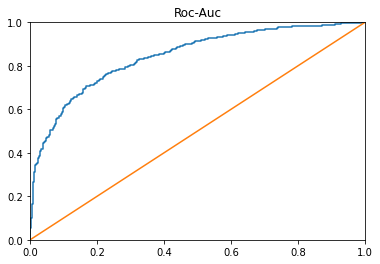

In [38]:
fpr,tpr,thresholds=metrics.roc_curve(target_test,probabilities_one_test)
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('Roc-Auc');

вывод: Были изучены данные, проведена подготовка данных( были удалилены пропуски в столбце Tenure, которых оказалось менее 10%), были исключены категориальные переменные для проведения исследования, преобразованы  выборки методом стандартизации. В исследовании были рассмотрены три модели, в результате чего, были отобраны наибольшими показателями F1-меры. на тестовый выборке модели случайного леса показала лучший результат. На тестовой выборке значение F1-меры оказалось равным 0.6, а Roc-Auc 0,84, что продемонстрировано на графике 